In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display

In [2]:
# !pip install plotly

In [3]:
# !pip install ipywidgets

In [4]:
bs_crab = pd.read_csv("../data/Armistead; 1975 - 2017 eastern Bering Sea Crab Distribution For Web.csv")

In [5]:
NOAA_bottomtrawl = pd.read_csv("../data/Detailed Crab Data From NOAA Fisheries Service Annual Eastern Bering Sea Summer Bottom Trawl Surveys 1975 - 2018.csv")

C:\Users\seanf\AppData\Local\Temp\ipykernel_33664\1276909703.py:1: DtypeWarning: Columns (5,23) have mixed types. Specify dtype option on import or set low_memory=False.
  NOAA_bottomtrawl = pd.read_csv("../data/Detailed Crab Data From NOAA Fisheries Service Annual Eastern Bering Sea Summer Bottom Trawl Surveys 1975 - 2018.csv")


In [6]:
merged = pd.merge(bs_crab, NOAA_bottomtrawl, on=['vessel','cruise', 'haul'], how='inner')

In [7]:
merge = merged.drop_duplicates()

In [8]:
merge

,station_id,survey_year,start_date,common_name,scientific_name,cpue,maturity_code,maturity_name,bottom_depth,surface_temperature,...,egg_condition,clutch_size,chela_height,disease_code,disease_dorsal,disease_ventral,disease_legs,weight,comments,merus_length
0,C-09,1975,1975-06-02T00:00:00.000,red king crab,Paralithodes camtschaticus,276,1,Immature male,53,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-09,1975,1975-06-02T00:00:00.000,red king crab,Paralithodes camtschaticus,276,1,Immature male,53,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C-09,1975,1975-06-02T00:00:00.000,red king crab,Paralithodes camtschaticus,276,1,Immature male,53,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C-09,1975,1975-06-02T00:00:00.000,red king crab,Paralithodes camtschaticus,276,1,Immature male,53,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C-09,1975,1975-06-02T00:00:00.000,red king crab,Paralithodes camtschaticus,276,1,Immature male,53,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27493585,G-21,2017,2017-07-06T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,66,7.0,...,NaN,NaN,19.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27493586,G-21,2017,2017-07-06T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,66,7.0,...,NaN,NaN,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27493587,G-21,2017,2017-07-06T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,66,7.0,...,NaN,NaN,15.3,NaN,NaN,NaN,NaN,340.0,NaN,NaN
27493588,G-21,2017,2017-07-06T00:00:00.000,hair crab,Erimacrus isenbeckii,72,9,Total female,66,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
bs_crab['common_name'].value_counts()

common_name
snow crab               76678
southern Tanner crab    63414
red king crab           21622
hybrid Tanner crab      14737
blue king crab           7786
hair crab                5201
Name: count, dtype: int64

In [10]:
red_king = bs_crab[bs_crab['common_name'] == 'red king crab']
blue_king = bs_crab[bs_crab['common_name'] == 'blue king crab']
snow_crab = bs_crab[bs_crab['common_name'] == 'snow crab']
southern_tanner = bs_crab[bs_crab['common_name'] == 'southern Tanner crab']
hybrid_tanner = bs_crab[bs_crab['common_name'] == 'hybrid Tanner crab']
hair_crab = bs_crab[bs_crab['common_name'] == 'hair crab']

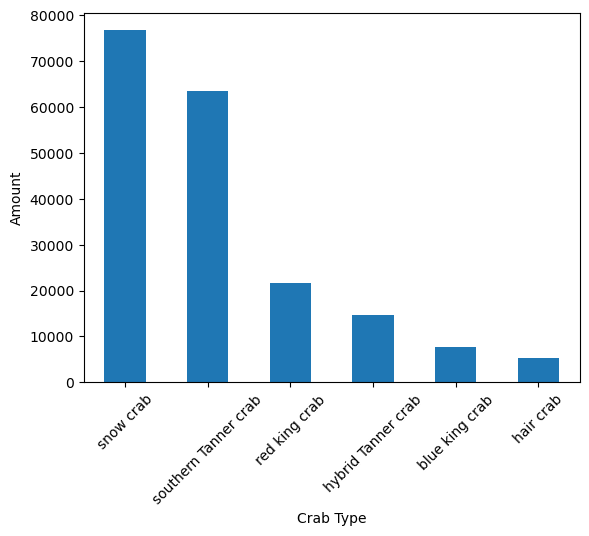

In [11]:
bs_crab['common_name'].value_counts().plot(kind='bar')
plt.ylabel('Amount')
plt.xlabel('Crab Type')
plt.xticks(rotation=45)
plt.show()

In [12]:
bs_crab

,station_id,survey_year,start_date,common_name,scientific_name,cpue,maturity_code,maturity_name,bottom_depth,surface_temperature,bottom_temperature,vessel,cruise,haul,data_date,location_1,latitude,longitude,:@computed_region_btis_nwva
0,C-09,1975,1975-06-02T00:00:00.000,red king crab,Paralithodes camtschaticus,276,1,Immature male,53,4.5,1.6,14,197502,2,2017-11-21T00:00:00.000,"{'latitude': '55.65', 'longitude': '-162.86667'}",55.65000,-162.86667,3.0
1,I-09,1975,1975-06-15T00:00:00.000,red king crab,Paralithodes camtschaticus,66,1,Immature male,44,3.2,0.4,14,197502,39,2017-11-21T00:00:00.000,"{'latitude': '57.66667', 'longitude': '-162.73...",57.66667,-162.73333,3.0
2,G-09,1975,1975-06-15T00:00:00.000,red king crab,Paralithodes camtschaticus,69,1,Immature male,60,2.5,1.6,14,197502,41,2017-11-21T00:00:00.000,"{'latitude': '57.0', 'longitude': '-162.76667'}",57.00000,-162.76667,3.0
3,I-14,1975,1975-06-10T00:00:00.000,red king crab,Paralithodes camtschaticus,1588,1,Immature male,49,0.3,0.1,14,197502,22,2017-11-21T00:00:00.000,"{'latitude': '57.68333', 'longitude': '-159.63...",57.68333,-159.63333,3.0
4,J-12,1975,1975-06-12T00:00:00.000,red king crab,Paralithodes camtschaticus,345,1,Immature male,49,1.9,1.7,14,197502,31,2017-11-21T00:00:00.000,"{'latitude': '58.0', 'longitude': '-160.85'}",58.00000,-160.85000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189433,V-25,2017,2017-07-31T00:00:00.000,hair crab,Erimacrus isenbeckii,76,8,Total male,62,11.1,-1.5,94,201701,215,2017-11-21T00:00:00.000,"{'latitude': '62.0047', 'longitude': '-173.738...",62.00470,-173.73871,NaN
189434,Q-18,2017,2017-06-30T00:00:00.000,hair crab,Erimacrus isenbeckii,75,9,Total female,36,5.2,5.1,162,201701,66,2017-11-21T00:00:00.000,"{'latitude': '60.33136', 'longitude': '-168.67...",60.33136,-168.67253,NaN
189435,J-03,2017,2017-06-26T00:00:00.000,hair crab,Erimacrus isenbeckii,66,9,Total female,61,7.4,0.8,94,201701,90,2017-11-21T00:00:00.000,"{'latitude': '57.99948', 'longitude': '-166.53...",57.99948,-166.53206,NaN
189436,N-19,2017,2017-07-08T00:00:00.000,hair crab,Erimacrus isenbeckii,75,9,Total female,51,5.6,3.7,162,201701,97,2017-11-21T00:00:00.000,"{'latitude': '59.33354', 'longitude': '-169.23...",59.33354,-169.23752,NaN


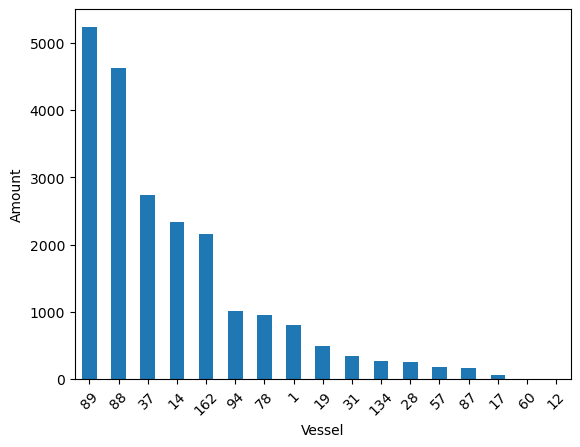

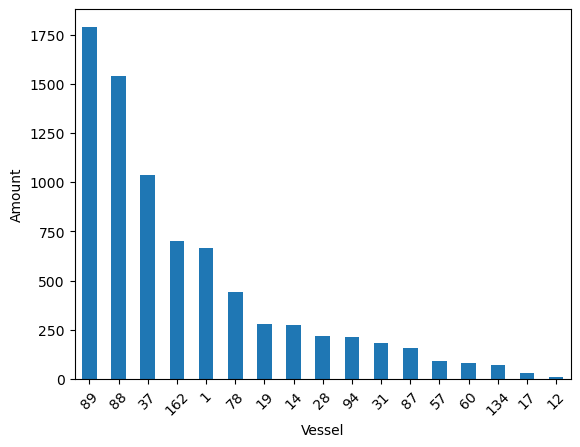

In [13]:
red_king['vessel'].value_counts().plot(kind='bar')
plt.ylabel('Amount')
plt.xlabel('Vessel')
plt.xticks(rotation=45)
plt.show()

blue_king['vessel'].value_counts().plot(kind='bar')
plt.ylabel('Amount')
plt.xlabel('Vessel')
plt.xticks(rotation=45)
plt.show()

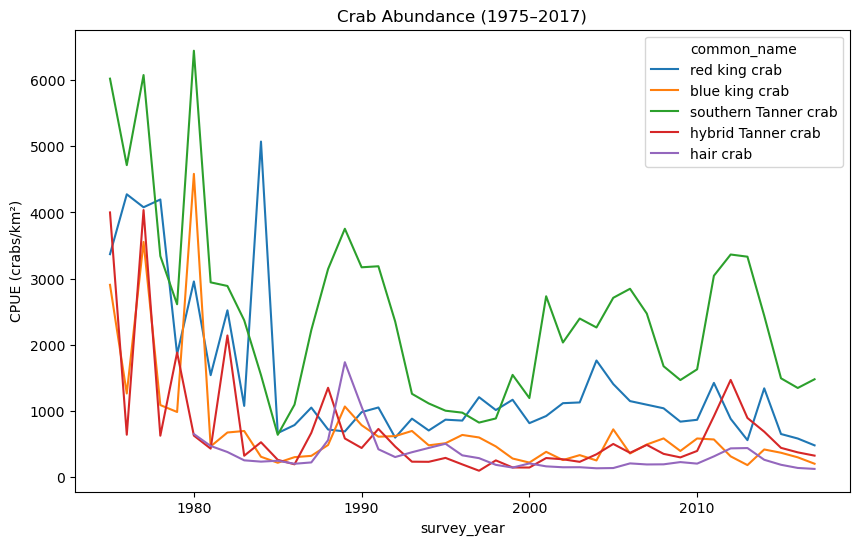

In [14]:
trends = bs_crab.groupby(['survey_year', 'common_name'])['cpue'].mean().unstack()

trends[['red king crab', 'blue king crab', 'southern Tanner crab', 'hybrid Tanner crab', 'hair crab']].plot(
    title='Crab Abundance (1975–2017)',
    ylabel='CPUE (crabs/km²)',
    figsize=(10, 6)
)
plt.show()

In [15]:
NOAA_bottomtrawl

,crab_id,hauljoin,cruise,vessel,haul,station,species_kfrc,species_code,sex,length,...,egg_condition,clutch_size,chela_height,disease_code,disease_dorsal,disease_ventral,disease_legs,weight,comments,merus_length
0,689,899411.0,199701,88,103,P19,4.0,69400,1,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,690,899411.0,199701,88,103,P19,4.0,69400,1,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,691,899411.0,199701,88,103,P19,4.0,69400,1,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,692,899411.0,199701,88,103,P19,7.0,68580,2,NaN,...,1.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,693,899411.0,199701,88,103,P19,7.0,68580,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241420,3201852,-17820.0,201801,94,129,IH2120,2.0,69322,1,91.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2241421,3201858,-17820.0,201801,94,129,IH2120,6.0,68560,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2241422,3201864,-17820.0,201801,94,129,IH2120,6.0,68560,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2241423,3201870,-17862.0,201801,94,138,I-23,7.0,68580,2,NaN,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
filtered_noaa = NOAA_bottomtrawl[['crab_id', 'hauljoin', 'cruise', 'vessel', 'haul', 'station', 'species_kfrc', 'species', 'sex',
 'shell_condition', 'sampling_factor', 'gis_station', 'width', 'weight', 'disease_dorsal', 'disease_ventral', 'disease_legs']]

KeyError: "['species'] not in index"

In [ ]:
cln_disease = filtered_noaa[[
    'crab_id', 'hauljoin', 'cruise', 'vessel', 'haul', 'station', 
    'species_kfrc', 'species', 'sex','shell_condition', 
    'sampling_factor', 'gis_station', 'width', 'weight', 
    'disease_dorsal', 'disease_ventral', 'disease_legs']].dropna(subset=['disease_dorsal', 'disease_ventral', 'disease_legs'], how='any')

In [ ]:
filtered_noaa

In [ ]:
cln_disease['haul'] == 51

In [ ]:
print(cln_disease['cruise'].value_counts().head())
print(cln_disease['species'].value_counts().head())
print(cln_disease['haul'].value_counts().head())

In [ ]:
print(cln_disease.groupby('haul')['cruise'].value_counts().head())
print(cln_disease.groupby('haul')['species'].value_counts().head())

In [ ]:
merge = merged.drop_duplicates(subset='crab_id', keep='first')

In [ ]:
merge = merge.drop(columns=[
    'scientific_name', 
    'weight',
    'maturity_code', 
    'data_date', 
    ':@computed_region_btis_nwva', 
    'hauljoin', 
    'station', 
    'species_kfrc', 
    'species_code',
    'species',
    'sex__',
    'length',
    'shell_condition',
    'sampling_factor',
    'gis_station',
    'width',
    'egg_color',
    'egg_condition',
    'clutch_size',
    'chela_height',
    'weight',
    'comments',
    'merus_length',
    ])

In [ ]:
merge = merge.drop(columns=['location_1'])

In [ ]:
disease_present = merge[merge['disease_code'].notna()]
disease_present

In [ ]:
disease_present[disease_present['cruise'] == 198103]

In [ ]:
counts = merge['common_name'].value_counts()

plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='navy')

plt.title('Count of Crabs by Common Name')
plt.xlabel('Common Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
disease_crab_counts = disease_present['common_name'].value_counts()

plt.figure(figsize=(10, 6))
disease_crab_counts.plot(kind='bar', color='darkgreen')

plt.title('Count of Crabs by Common Name with Disease Present')
plt.xlabel('Common Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
disease_year_counts = disease_present['survey_year'].value_counts()

plt.figure(figsize=(10, 6))
disease_year_counts.plot(kind='bar', color='darkred')

plt.title('Count of Years with Disease')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
center_lat = merge['latitude'].mean()
center_lon = merge['longitude'].mean()

In [ ]:
m = folium.Map(location=[center_lat, center_lon], zoom_start=6)

In [ ]:
for _, row in disease_present.iterrows():
    popup_text = (
        f"<b>Common Name:</b> {row['common_name']}<br>"
        f"<b>Vessel:</b> {row['vessel']}<br>"
        f"<b>Haul:</b> {row['haul']}<br>"
        f"<b>Cruise:</b> {row['cruise']}<br>"
        f"<b>Survey Year:</b> {row['survey_year']}<br>"
        f"<b>Surface Temp:</b> {row['surface_temperature']} °C<br>"
        f"<b>Bottom Temp:</b> {row['bottom_temperature']} °C<br>"
        f"<b>Bottom Depth:</b> {row['bottom_depth']} m"
    )

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color='crimson',
        fill=True,
        fill_opacity=0.8,
        popup=folium.Popup(popup_text, max_width=350)
    ).add_to(m)

display(m)

In [ ]:
disease_present_sorted = disease_present.sort_values('survey_year')
disease_present_sorted['disease_code'].value_counts()

In [ ]:
merge.to_csv('merge_data.csv', index=False)

In [ ]:
NOAA_bottomtrawl['vessel'].value_counts()

In [ ]:
print("NOAA_bottomtrawl vessels:", NOAA_bottomtrawl['vessel'].nunique())
print("merged vessels:", merged['vessel'].nunique())
print("bs_crab vessels:", bs_crab['vessel'].nunique())